# Loading Dataset & Quick Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
from sklearn.datasets import load_boston
data = load_boston()
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [2]:
print(data.data.shape) # data.data ==> Features
print(data.target.shape) # data.target ==> Label

(506, 13)
(506,)


In [3]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Plot Features V.S. Y
Can you explain the relation between other features with house prices?

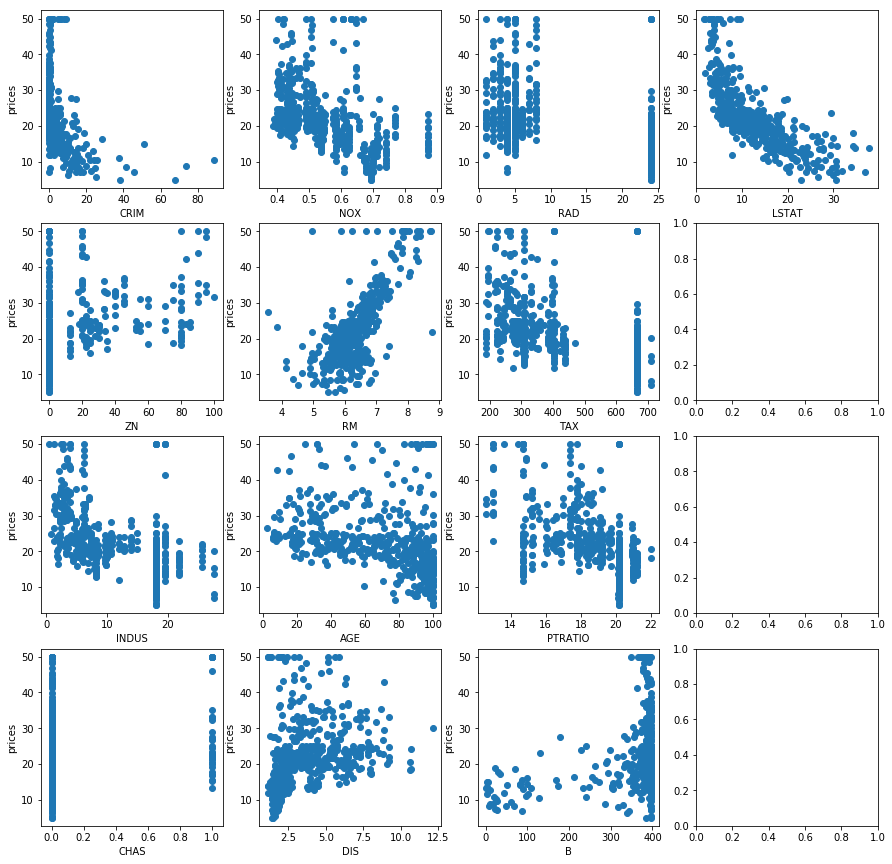

'\n- CRIM     per capita crime rate by town\n- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n- INDUS    proportion of non-retail business acres per town\n- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n- NOX      nitric oxides concentration (parts per 10 million)\n- RM       average number of rooms per dwelling\n- AGE      proportion of owner-occupied units built prior to 1940\n- DIS      weighted distances to five Boston employment centres\n- RAD      index of accessibility to radial highways\n- TAX      full-value property-tax rate per $10,000\n- PTRATIO  pupil-teacher ratio by town\n- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n- LSTAT    % lower status of the population\n'

In [4]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
import math
fig, axes = plt.subplots(4,4)
for i in range(13):
    x_f = i%4
    y_f = math.floor((i)/4)
    axes[x_f, y_f].scatter(data.data[:,i], data.target) 
    axes[x_f, y_f].set_xlabel(features[i])
    axes[x_f, y_f].set_ylabel('prices')
plt.show()
"""
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
"""

# Predicting Home Prices: SVR
在沒有做任何new feature生成的情況下，是否可以讓SVR的performance接近linear regression?

In [5]:
X = data.data
y = data.target

In [6]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42, shuffle=True)

from sklearn import svm
from sklearn.model_selection import GridSearchCV
model = svm.SVR(kernel='poly',gamma=1e-2,degree=2 , C=0.1)
model.fit(X_train, y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=0.01,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
# make prediction here
# y_pred = '''make prediction on testing dataset here'''
y_pred = model.predict(X_test)

# Evaluation

RMS: 4.01051816677
R2:0.70


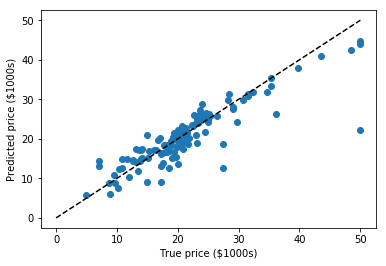

In [8]:
from sklearn import metrics
# visualize the result
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50],'--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test) ** 2)))
print('R2:%.2f'%metrics.r2_score(y_pred, y_test))